#  Ⅳ-2-6 이미지 분류하기
### [발전 활동] 직접 쓴 손 글씨 숫자를 딥러닝으로 분류하기

## 1단계 딥러닝 모델링 코드 작성하기

## 모듈 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model


2. 업로드된 모델 파일을 불러온다.

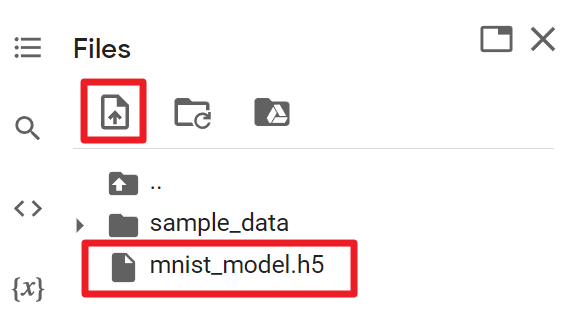

In [2]:
# 기본활동 후 생성된 모델 중 가장 마지막 파일을 mnist_model.h5로 이름을 바꾸어 저장합니다.
model = load_model('model/06 - 0.0265.h5')

3. 모델 요약 정보를 확인한다.

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                        

## 3단계 숫자 손 글씨 이미지 인식하기

1. 이미지를 코랩에 업로드한다.

https://www.photopea.com/ 에서 숫자 3, 4, 5, 9 만들기
28x28 픽셀


2. 숫자 이미지를 불러온 후, 확인한다.

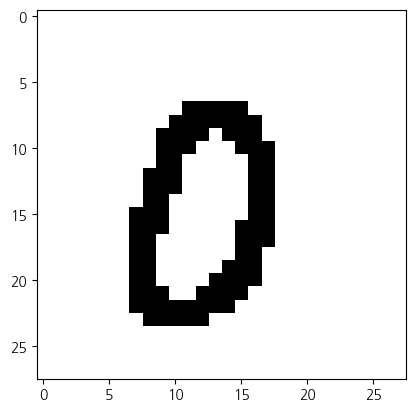

In [40]:
img = Image.open('0.png')
plt.imshow(img);

In [41]:
img.size

(28, 28)

3. 이미지를 넘파이 배열로 변환한다.

In [42]:
img = np.asarray(img)
print(img)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 

4. 숫자 이미지를 인식시킨다.

In [43]:
res = model.predict(np.reshape(img, (1,28, 28)))
res

1/1 [==============================] - 0s 26ms/step


array([[9.9999309e-01, 3.3872270e-11, 2.5175975e-06, 1.0366477e-08,
        2.1612967e-12, 5.2295366e-07, 6.9108985e-09, 2.6349396e-06,
        1.2328567e-06, 3.2712464e-09]], dtype=float32)

In [44]:
print(res[0])

[9.9999309e-01 3.3872270e-11 2.5175975e-06 1.0366477e-08 2.1612967e-12
 5.2295366e-07 6.9108985e-09 2.6349396e-06 1.2328567e-06 3.2712464e-09]


In [45]:
np.argmax(res[0])

0